# TD ABM1 Paul Faverjon

# 1. Generation of a random price

In [5]:
import numpy as numpy
from matplotlib import pyplot as plt

In [6]:
NIT=1000
epsilon=numpy.random.normal(size=NIT)
price=[30] #I chose initial price at 30$
for k in range(1,NIT):
    price.append(price[k-1]+epsilon[k])  
time=numpy.linspace(1,1000,1000)

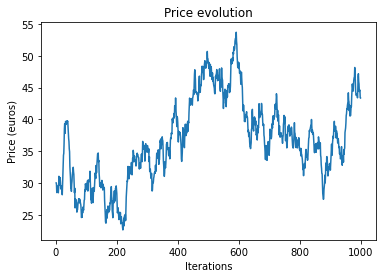

In [7]:
plt.plot(time,price)
plt.title("Price evolution")
plt.xlabel("Iterations")
plt.ylabel("Price (euros)")
plt.show()

# 2. Choose of a strategy

I chose $ a_{1,t} = +sign(r_t) $ 


# 3.Mesure of the influence

1. I chose $\Phi _1=0.5 $ and $ r_0=0 $

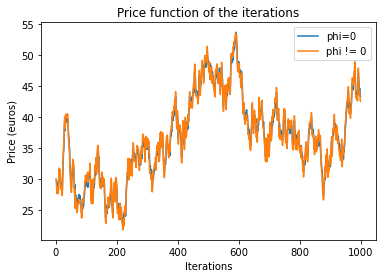

In [8]:
retur=[0]
phi=0.77
for k in range(1,NIT):
    retur.append(epsilon[k]+phi*numpy.sign(retur[k-1]))

price2=[30] #I take 30 as initial price
for k in range(1,NIT):
    price2.append(price[k-1]+retur[k])
   
plt.plot(time,price,label="phi=0") #phi = 0 is the same as the very first graph
plt.plot(time,price2,label="phi != 0")
plt.title("Price function of the iterations")
plt.xlabel("Iterations")
plt.ylabel("Price (euros)")
plt.legend()
plt.show()

For $\Phi _1>0$, ups and downs are more accentuated

2. The variance for $ r $ is higher than for  $\epsilon $, which is coherent with what was shown higher

In [9]:
print(numpy.var(retur))
print(numpy.var(epsilon))

1.4925720736441237
0.8984714148996535


3. For $ h=0 $ , the variables are autocorrelated pefectly. Autocorrelation diminishes when the lag increases, and reaches 0 for $h=10$. Returns are previsible on short-term.

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([-0.03537624, -0.01970588,  0.00990724, -0.0270884 ,  0.00553567,
         0.04053765,  0.08537756,  0.16385988,  0.30714418,  0.50368469,
         1.        ,  0.50368469,  0.30714418,  0.16385988,  0.08537756,
         0.04053765,  0.00553567, -0.0270884 ,  0.00990724, -0.01970588,
        -0.03537624]),
 <matplotlib.lines.Line2D at 0x116441910>)

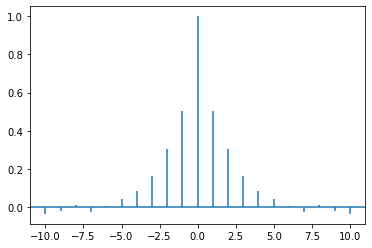

In [10]:
plt.acorr(retur)

4.  $V(r)$ is a non decreasing function of $\Phi _1$. The higher $\Phi _1$, the biggest the weight of the strategivcal information, which accentuate ups and downs of $r$r, and increases $V(r)$ 

/Users/paulfaverjon/miniforge3/envs/finance/lib/python3.9/site-packages/numpy/core/_methods.py:197: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


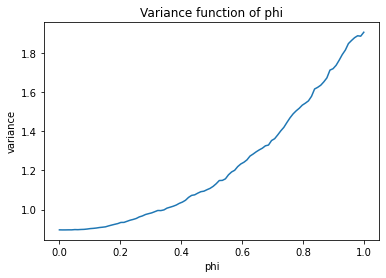

In [11]:
def var_retur(phi):
    retur=[0]
    NIT=1000
    for k in range(1,NIT):
        retur.append(epsilon[k]+phi*numpy.sign(retur[k-1]))
    var=numpy.var(retur)
    return var


variance=var_retur(numpy.linspace(0,1,100))
phi=numpy.linspace(0,1,100)
plt.plot(phi,variance)
plt.title("Variance function of phi")
plt.xlabel("phi")
plt.ylabel("variance")
plt.show()


5.The higher $\Phi _1$ , the higher the autocorrelation so short term return seem more previsible. When $\Phi _1$ grows, the weight of $\omega$ increases in the return, and we diminish the random contribution in the return. It becomes more predictable.

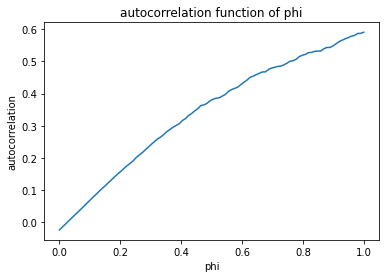

In [12]:
def rend(phi):
    retur=[0]
    NIT=1000
    for k in range(1,NIT):
        retur.append(epsilon[k]+phi*numpy.sign(retur[k-1]))
    return retur

def autocorr(x, t=1):
    return numpy.corrcoef(numpy.array([x[:-t], x[t:]]))[0][1]

phi=numpy.linspace(0,1,100)
autoc=[]
for i in range(100):
    autoc.append(autocorr(rend(phi[i])))

plt.plot(phi,autoc)
plt.title("autocorrelation function of phi")
plt.xlabel("phi")
plt.ylabel("autocorrelation")
plt.show()


# 4. Multiple stategies

We take the opposite strategy for the second agent $ a_{2,t} = -sign(r_t) $ and so $r_{t+1} = \omega_{1,t+1} + \omega_{2,t+1}$.

In [13]:
def var(phi1,phi2):
    rendement=[0]
    NIT=1000
    for k in range(1,NIT):
        rendement.append(epsilon[k]+phi1*numpy.sign(rendement[k-1])-phi2*numpy.sign(rendement[k-1]))
    variance=numpy.var(rendement)
    return variance

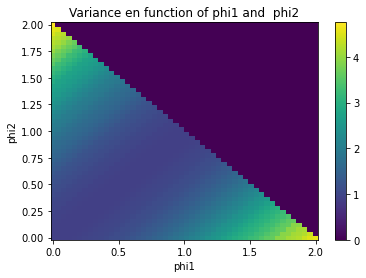

In [14]:
x = numpy.linspace(0, 2, 50)
y = numpy.linspace(0, 2, 50)
X, Y = numpy.meshgrid(x, y)

Z=numpy.zeros((50,50))
for i in range(50):
    for j in range(50):
        if X[j,j] + Y[i,i] <= 2: 
            Z[i,j] = var(X[j,j],Y[i,i])
        else: 
            Z[i,j] = 0
        
plt.pcolor(X, Y, Z)
plt.colorbar()
plt.title("Variance en function of phi1 and  phi2")
plt.xlabel("phi1")
plt.ylabel("phi2")

plt.show()